# **PART 1 - Exploring the Data** #


This notebook is where you will bring everything you're learning about data, python, and machine learning together. Since this notebook is mostly blank, you'll need to bring code from your Python Practice notebooks in the Lessons into this notebook so you have it all in one place. 

---





## Basic Data Setup

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Pokemon.csv',engine='python')

# Print the first few lines of the data frame to check that everything looks good
df.head() # See the top 5 rows of the dataframe


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
# Create dataframe with objects converted to strings, renamed columns to make it easier to program, and convert Legendary boolean to 0/1
pk = {
    'ID': df['#'].astype(int),                   
    'Name': df['Name'].astype(str),           
    'Total': df['Total'].astype(float),                       
    'Type1': df['Type 1'].astype(str),           
    'Type2': df['Type 2'].astype(str),           
    'Total': df['Total'].astype(int),                   
    'HP': df['HP'].astype(int),                   
    'Attack': df['Attack'].astype(int),                   
    'Defense': df['Defense'].astype(int),                   
    'SpAtk': df['Sp. Atk'].astype(int),                   
    'SpDef': df['Sp. Def'].astype(int),                   
    'Speed': df['Speed'].astype(int),                   
    'Generation': df['Generation'].astype(int),
    'Legendary': df['Legendary'].apply(lambda x: 1 if x else 0)
}
pokemon = pd.DataFrame(pk)

In [6]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          800 non-null    int64 
 1   Name        800 non-null    object
 2   Total       800 non-null    int64 
 3   Type1       800 non-null    object
 4   Type2       800 non-null    object
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   SpAtk       800 non-null    int64 
 9   SpDef       800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 81.4+ KB


## Information about the variables

From https://www.kaggle.com/datasets/abcsds/pokemon (mostly from Myles O'Neal)

>ID: ID for each pokemon

>Name: Name of each pokemon

>Type1: Each pokemon has a type, this determines weakness/resistance to attacks

>Type2: Some pokemon are dual type and have 2

>Total: sum of all stats that come after this, a general guide to how strong a pokemon is

>HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

>Attack: the base modifier for normal attacks (eg. Scratch, Punch)

>Defense: the base damage resistance against normal attacks

>SpAtk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

>SpDef: the base damage resistance against special attacks

>Speed: determines which pokemon attacks first each round

>Generation: A Pokemon Generation is a group of games that were released at or around the same time. Games in the same generation are compatible with the others, containing the same Pokémon and the number of moves there are to be learned. （from https://pokemon.fandom.com/wiki/Generation）

>Legendary: Legendary Pokemon "are extremely rare and often very powerful Pokémon that are often associated with legends of creation and/or destruction within their endemic regions." (from https://pokemon.fandom.com/wiki/Legendary_Pok%C3%A9mon)


## Your Research Questions ##
Keep track of your research questions here. These may need to shift as you get more familiar with the data, and that's okay! 


Supervised Question: Can we predict if a Pokemon is Legendary based on other Pokemon Statistics?

# **PART 2 - Data Visualization** #

In [8]:
pokemon.describe()

,ID,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


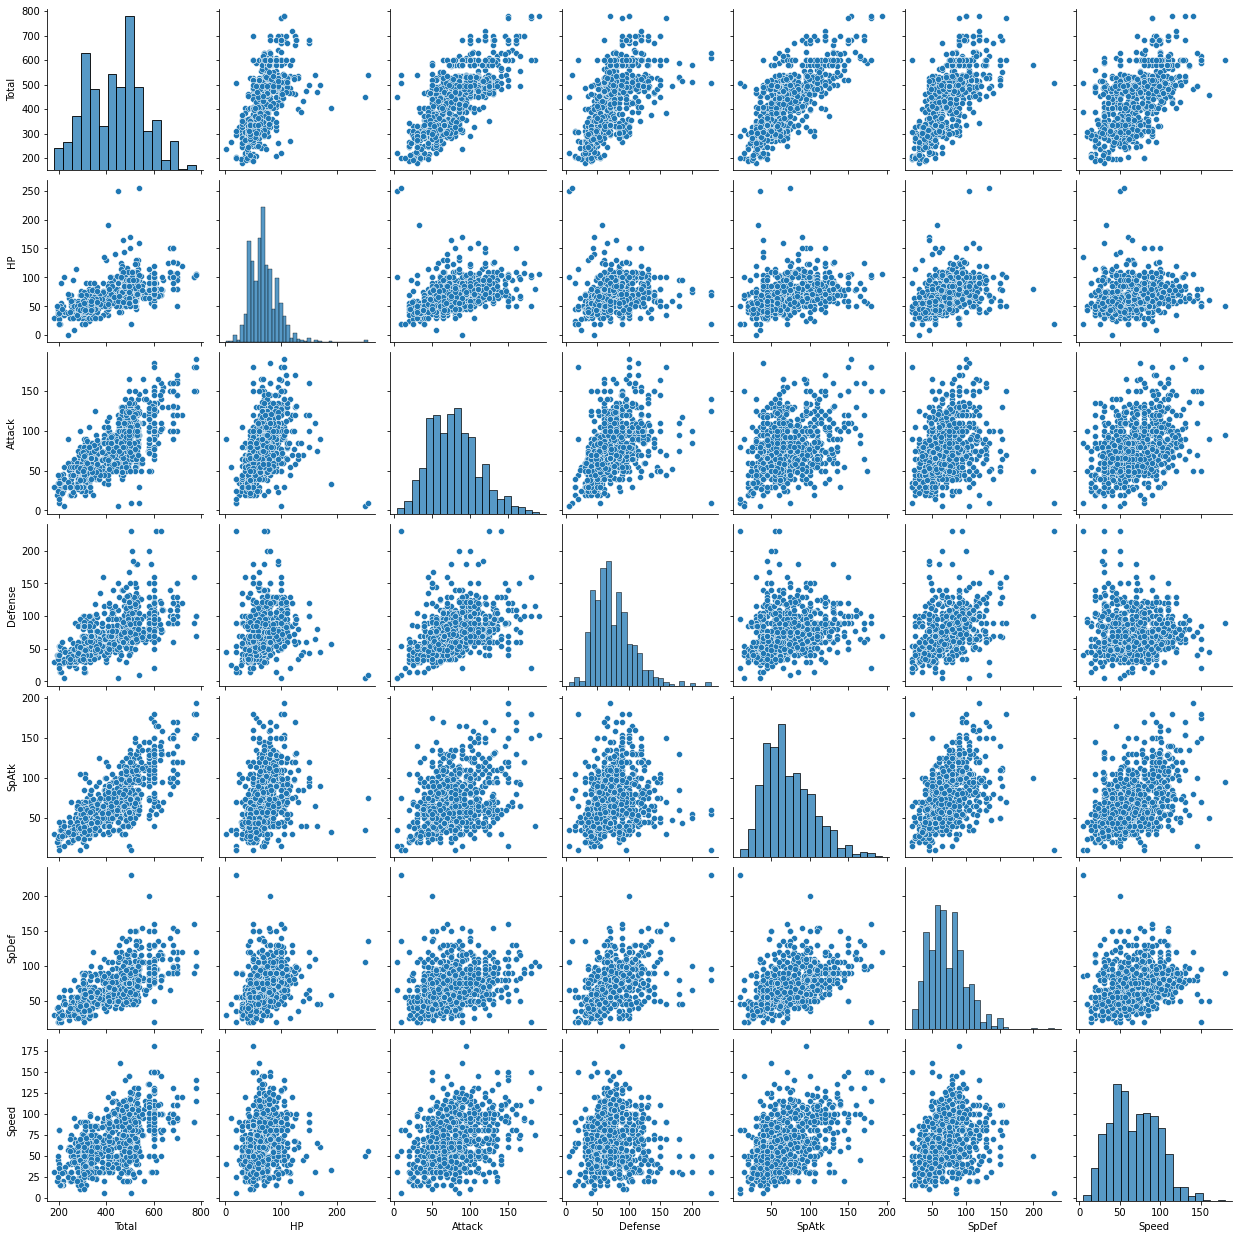

In [9]:
# Uses advanced libraries for quick data visualizations
sns.pairplot(pokemon[['Total','HP','Attack','Defense','SpAtk','SpDef','Speed']])

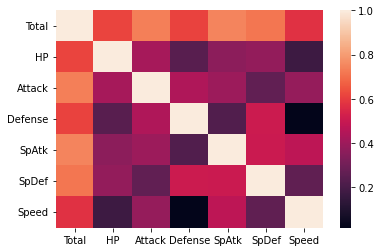

In [10]:
# This heatmap shows how well various parameters correlate with each other
sns.heatmap(pokemon[['Total','HP','Attack','Defense','SpAtk','SpDef','Speed']].corr())

In [11]:
# Create a data frame that groups by geographic area and finds the average
group_type1_df = pokemon.groupby(["Type1"])[['HP','Attack','Defense','SpAtk','SpDef','Speed']].mean()
print (group_type1_df)

                 HP      Attack     Defense      SpAtk      SpDef       Speed
Type1                                                                        
Bug       56.884058   70.971014   70.724638  53.869565  64.797101   61.681159
Dark      66.806452   88.387097   70.225806  74.645161  69.516129   76.161290
Dragon    83.312500  112.125000   86.375000  96.843750  88.843750   83.031250
Electric  59.795455   69.090909   66.295455  90.022727  73.704545   84.500000
Fairy     74.117647   61.529412   65.705882  78.529412  84.705882   48.588235
Fighting  69.851852   96.777778   65.925926  53.111111  64.703704   66.074074
Fire      69.903846   84.769231   67.769231  88.980769  72.211538   74.442308
Flying    70.750000   78.750000   66.250000  94.250000  72.500000  102.500000
Ghost     64.437500   73.781250   81.187500  79.343750  76.468750   64.343750
Grass     67.271429   73.214286   70.800000  77.500000  70.428571   61.928571
Ground    73.781250   95.750000   84.843750  56.468750  62.75000

<Figure size 2880x1152 with 0 Axes>

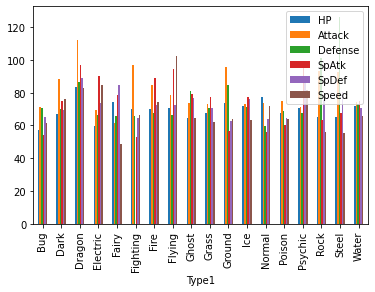

In [12]:
plt.figure(figsize=(40,16))
group_type1_df[['HP','Attack','Defense','SpAtk','SpDef','Speed']].plot(kind="bar")
plt.show()

# **PART 3 - Feature Engineering** #

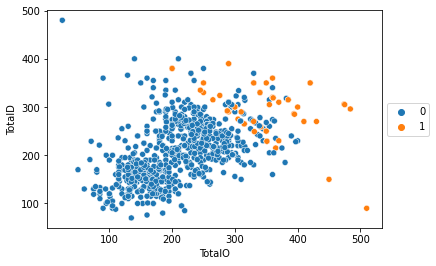

In [13]:
pokemon['TotalO'] = pokemon['Attack'] + pokemon['SpAtk'] + pokemon['Speed']
pokemon['TotalD'] = pokemon['HP'] + pokemon['Defense'] + pokemon['SpDef']

# We can make these numbers or text. Here, 5=top 20%, 4=60-80%, 3=40-60%, 2-20-40%; 1-0-20%)
ranking_labels = [5,4,3,2,1]
pokemon['HP_Bin'] = pd.qcut(pokemon['HP'],q=5,labels=ranking_labels)
pokemon['Attack_Bin'] = pd.qcut(pokemon['Attack'],q=5,labels=ranking_labels)
pokemon['Defense_Bin'] = pd.qcut(pokemon['Defense'],q=5,labels=ranking_labels)
pokemon['SpAtk_Bin'] = pd.qcut(pokemon['SpAtk'],q=5,labels=ranking_labels)
pokemon['SpDef_Bin'] = pd.qcut(pokemon['SpDef'],q=5,labels=ranking_labels)
pokemon['Speed_Bin'] = pd.qcut(pokemon['Speed'],q=5,labels=ranking_labels)
pokemon['HP'] = pokemon['HP'].astype(int)
pokemon['Attack_Bin'] = pokemon['Attack_Bin'].astype(int)
pokemon['Defense_Bin'] = pokemon['Defense_Bin'].astype(int)
pokemon['SpAtk_Bin'] = pokemon['SpAtk_Bin'].astype(int)
pokemon['SpDef_Bin'] = pokemon['SpDef_Bin'].astype(int)
pokemon['Speed_Bin'] = pokemon['Speed_Bin'].astype(int)

sns.scatterplot(data=pokemon, x='TotalO', y='TotalD', hue='Legendary')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# **PART 4 - Supervised Learning** #

|--- SpAtk <= 118.00
|   |--- SpDef <= 89.50
|   |   |--- SpAtk <= 114.50
|   |   |   |--- HP <= 113.00
|   |   |   |   |--- class: 0
|   |   |   |--- HP >  113.00
|   |   |   |   |--- Speed <= 90.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Speed >  90.00
|   |   |   |   |   |--- class: 0
|   |   |--- SpAtk >  114.50
|   |   |   |--- HP <= 87.50
|   |   |   |   |--- class: 0
|   |   |   |--- HP >  87.50
|   |   |   |   |--- class: 1
|   |--- SpDef >  89.50
|   |   |--- Speed <= 88.50
|   |   |   |--- Defense <= 98.50
|   |   |   |   |--- class: 0
|   |   |   |--- Defense >  98.50
|   |   |   |   |--- HP <= 77.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- HP >  77.50
|   |   |   |   |   |--- class: 0
|   |   |--- Speed >  88.50
|   |   |   |--- HP <= 85.00
|   |   |   |   |--- Defense <= 75.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Defense >  75.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- HP >  85.00
|   |   |   |   |--- SpAtk <= 66.00

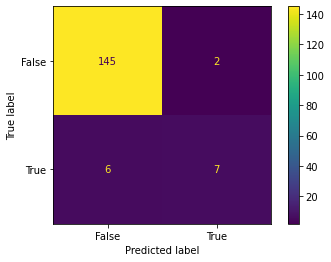

0.95
0.7777777777777778
0.5384615384615384
0.6363636363636364


In [14]:
# import sklearn libraries
# Pokemon - Legendary or not using decision trees on the 6 "independent" variables
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

input_vars = ['HP','Attack','Defense','SpAtk','SpDef','Speed']
X_train, X_test, y_train, y_test = train_test_split(pokemon[input_vars], pokemon['Legendary'], test_size=0.2, random_state=89)

# Decision Tree classifier:
#Create dtc object
model = DecisionTreeClassifier(max_depth = 5, random_state = 14)
#fit our data
model.fit(X_train, y_train)

model_tree = export_text(model, feature_names = list(input_vars))
print(model_tree)

y_test_pred = model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_test,y_test_pred)
print(Accuracy)

Precision = metrics.precision_score(y_test,y_test_pred)
print(Precision)

Recall = metrics.recall_score(y_test,y_test_pred)
print(Recall)

F1_score = metrics.f1_score(y_test,y_test_pred)
print(F1_score)

In [15]:
# Define the inputs/features for the models you'll test below
# We'll use the number of pages (standardized), number of text reviews, publication year
# and whether or not a book is in english (dummy variable)
x = df[['Total','HP','Attack','Defense','Speed']]

# Define the targets - what we are trying to predict or classify
# Here we are trying to predict the "rating_levels"
y = df[['Legendary']]

# We'll save 20 percent of our data for testing and use 80 percent for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,4)
scores = {}
scores_list = []
F1 =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train.values.ravel())
    y_pred_knn = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred_knn)
    scores_list.append(metrics.accuracy_score(y_test,y_pred_knn))
    
print('Accuracy:',scores_list)

Accuracy: [0.96875, 0.95, 0.95]
